# Motion Planning in 2D

Peter Racioppo

## Basic Functionality
#### Generate random obstacles, check for intersections, create visibility graph, etc.

In [2]:
# Imports
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
from scipy.spatial import ConvexHull
matplotlib.rcParams.update({'font.size':16})
plt.rcParams["figure.figsize"] = 10,10

In [ ]:
# This function creates randomized rectangular obstacles
def f_Obstacles(n=100,w=5,N_obs=8):
  # Inputs:
    # n = size of grid
    # w = obstacle width
    # N_obs = number of obstacles
  # Outputs:
    # X_o = array of obstacle x positions
    # Y_o = array of obstacle y positions
    # I = array of indicators (0 = vertical, 1 = horizontal)
    # L = array of obstacle lengths

  # Draw obstacles as vertical bars with left edge at xi and bottm at yi:
  poss_x = np.arange(n-2*w)+w # Possible xi's; disallow overlapping grid edges
  poss_y = np.arange(n-2*w)+w # Possible yi's; disallow overlapping grid edges
  X_o = np.zeros(N_obs) # Initialize array of xi's
  Y_o = np.zeros(N_obs) # Initialize array of yi's
  I = np.zeros(N_obs) # Initialize array of indicators
  L = np.zeros(N_obs) # Initialize array of obstacle lengths
  for i in np.arange(N_obs):
    # Random indicator variable (0 = vertical, 1 = horizontal):
    I[i] = np.random.choice(np.arange(2))

    # Make sure there are still possible positions
    if (poss_x.size == 0) and (poss_y.size > 1):
      I[i] = 1
    if (poss_x.size > 0) and (poss_y.size == 0):
      I[i] = 0
    if (poss_x.size == 0) and (poss_y.size == 0):
      break

    L[i] = np.random.choice(np.arange(int(n/4))+int(n/4)) # Length of obstacle
    # If obstacle is horizontal:
    if I[i] == 0:
      # x ranges over all possible values, y ranges over all values that won't
      # cause it to leave boundaries.
      X_o[i] = np.random.choice(poss_x) # xi
      Y_o[i] = np.random.choice(np.arange(n-L[i])) # yi
    # If obstacle is vertical:          
    else:
      # Vice-versa
      X_o[i] = np.random.choice(np.arange(n-L[i])) # xi
      Y_o[i] = np.random.choice(poss_y) # yi
    # Disallow obstacles getting too close:
    poss_x = np.setdiff1d(poss_x,np.arange(4*w+1)-2*w+X_o[i])
    poss_y = np.setdiff1d(poss_y,np.arange(4*w+1)-2*w+Y_o[i])

  return(X_o,Y_o,I,L)

In [ ]:
# This function determines whether a point is inside an obstacle
def f_Check_Obstacles(x,y,X_o,Y_o,I,L,w):
  # Inputs:
  # x,y = position of point
  # X_o,Y_o = positions of obstacles
  # I, L, w = info about obstacles
  # Output: 1 if point is inside obstacle, 0 otherwise
  count = 0
  for i in np.arange(N_obs):
    if (I[i] == 0 and x >= X_o[i] and x <= X_o[i] + w and y >= Y_o[i] and y <= Y_o[i] + L[i]) \
    or (I[i] == 1 and x >= X_o[i] and x <= X_o[i] + L[i] and y >= Y_o[i] and y <= Y_o[i] + w):
      count += 1

  return (count > 0)

In [ ]:
# Plot stuff
def f_Plot(X_o,Y_o,I,L,w):
  N_obs = np.shape(X_o)[0]
  for i in np.arange(N_obs):
    # Create an array of the four corners:
    if I[i] == 0:
      pts = np.array([[X_o[i], Y_o[i]], [X_o[i]+w, Y_o[i]], [X_o[i]+w, Y_o[i]+L[i]], [X_o[i], Y_o[i]+L[i]]])
    else:
      pts = np.array([[X_o[i], Y_o[i]], [X_o[i], Y_o[i]+w], [X_o[i]+L[i], Y_o[i]+w], [X_o[i]+L[i], Y_o[i]]])
    hull = ConvexHull(pts) # Create convex hull object
    # Plot the obstacles:
    plt.fill(pts[hull.vertices,0], pts[hull.vertices,1],'black',zorder=0)

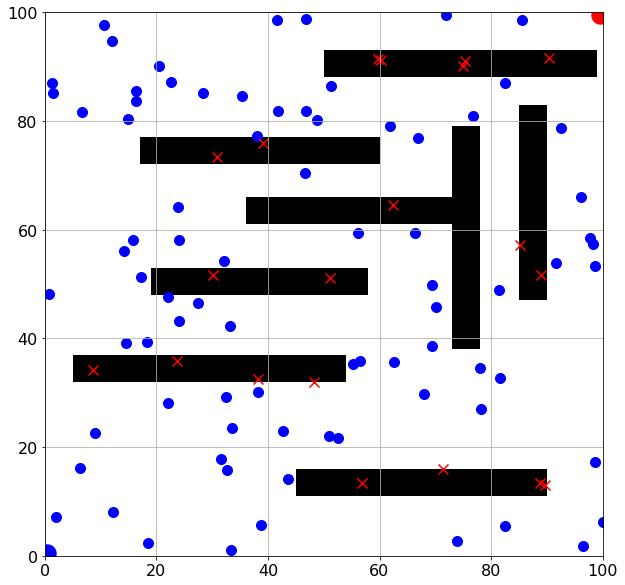

In [ ]:
# Test f_Obstacles and f_Check_Obstacle:

N = 100
w = int(N/20)
N_obs = 8

X_o,Y_o,I,L = f_Obstacles(n=n,w=w,N_obs=N_obs)

# Plot starting location as blue circle:
plt.scatter(0.5,0.5,s=300,marker="o",facecolors='b', edgecolors='b')
# Plot target location as red circle:
plt.scatter(n-0.5,n-0.5,s=300,marker="o",facecolors='r', edgecolors='r')

for i in np.arange(100):
  x = np.random.uniform(low=0, high=n)
  y = np.random.uniform(low=0, high=n)

  ist = f_Check_Obstacles(x,y,X_o,Y_o,I,L,w)
  if ist:
    plt.scatter(x,y,s=100,marker="x",facecolors='r', edgecolors='r',zorder=1)
  else:
    plt.scatter(x,y,s=100,marker="o",facecolors='b', edgecolors='b',zorder=1)

f_Plot(X_o,Y_o,I,L,w)
plt.xlim(0,n)
plt.ylim(0,n)
plt.grid()
plt.show()

In [ ]:
# This function determines whether two lines intersect:
def f_Line_Intersect(X1,X2,C1,C2):
  # Inputs:
  # X1, X2 = coordinates of pts
  # C1, C2 = coordinates of obstacles
  # Output:
  # inter = 1 if intersection, 0 otherwise

  dx1 = X1[0] - X1[1]
  dx2 = X2[0] - X2[1]
  dc1 = C1[1] - C1[0]
  dc2 = C2[1] - C2[0]
  denom = dx1*dc2 - dx2*dc1

  # If lines are parallel:
  if denom == 0:
    inter = 0
  # Otherwise:
  else:
    A = np.array([[dc2,-dc1],[-dx2,dx1]])
    v = np.array((C1[1],C2[1])) - np.array((X1[1],X2[1]))
    theta = np.matmul(A,v)/denom
    # If a convex combination:
    if theta[0] > 0 and theta[0] < 1 and theta[1] > 0 and theta[1] < 1:
      inter = 1
    else:
      inter = 0
    
  return inter

In [ ]:
# This function counts the number of intersections with an obstacle:
def f_Collision(X1,X2,X_o,Y_o,I,L,w):
  # Inputs:
  # X1,X2 = test points defining a line
  # X_o,Y_o = positions of obstacles
  # I, L, w = info about obstacles
  # Output:
  # int_count = count of number of intersections
  N_obs = np.shape(X_o)[0] # Number of obstacles


  int_count = 0 # Initialize intersection counter
  # Loop through the obstacles:
  for i in np.arange(N_obs):
    # If vertical:
    if I[i] == 0:
      # Left edge:
      C1 = np.array((X_o[i],X_o[i]))
      C2 = np.array((Y_o[i],Y_o[i]+L[i]))
      int_count += f_Line_Intersect(X1,X2,C1,C2)
      # Right edge:
      C1 = np.array((X_o[i]+w,X_o[i]+w))
      C2 = np.array((Y_o[i],Y_o[i]+L[i]))
      int_count += f_Line_Intersect(X1,X2,C1,C2)
      # Bottom edge:
      C1 = np.array((X_o[i],X_o[i]+w))
      C2 = np.array((Y_o[i],Y_o[i]))
      int_count += f_Line_Intersect(X1,X2,C1,C2)
      # Top edge:
      C1 = np.array((X_o[i],X_o[i]+w))
      C2 = np.array((Y_o[i]+L[i],Y_o[i]+L[i]))
      int_count += f_Line_Intersect(X1,X2,C1,C2)
      # If the line is entirely inside an obstacle:
      if X1[0] >= X_o[i] and X1[1] <= X_o[i]+w and X2[0] >= Y_o[i] and X2[1] <= Y_o[i]+L[i]:
        int_count += 1
    # If horizontal:
    else:
      # Bottom edge:
      C1 = np.array((X_o[i],X_o[i]+L[i]))
      C2 = np.array((Y_o[i],Y_o[i]))
      int_count += f_Line_Intersect(X1,X2,C1,C2)
      # Top edge:
      C1 = np.array((X_o[i],X_o[i]+L[i]))
      C2 = np.array((Y_o[i]+w,Y_o[i]+w))
      int_count += f_Line_Intersect(X1,X2,C1,C2)
      # Left edge:
      C1 = np.array((X_o[i],X_o[i]))
      C2 = np.array((Y_o[i],Y_o[i]+w))
      int_count += f_Line_Intersect(X1,X2,C1,C2)
      # Right edge:
      C1 = np.array((X_o[i]+L[i],X_o[i]+L[i]))
      C2 = np.array((Y_o[i],Y_o[i]+w))
      int_count += f_Line_Intersect(X1,X2,C1,C2)
      # If the line is entirely inside an obstacle:
      if X1[0] >= X_o[i] and X1[1] <= X_o[i]+L[i] and X2[0] >= Y_o[i] and X2[1] <= Y_o[i]+w:
        int_count += 1
  return int_count

4


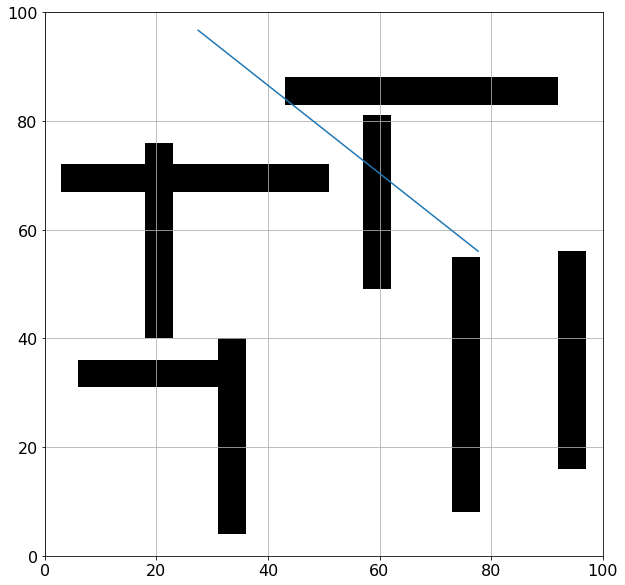

In [ ]:
# Test f_Collision:

n = 100
w = int(n/20)
N_obs = 8

X_o,Y_o,I,L = f_Obstacles(n=n,w=w,N_obs=N_obs)
X1 = np.array((np.random.uniform(5)*20,np.random.uniform(5)*20))
X2 = np.array((np.random.uniform(5)*20,np.random.uniform(5)*20))
intersections = f_Collision(X1,X2,X_o,Y_o,I,L,w)

print(intersections)
plt.plot(X1,X2)
f_Plot(X_o,Y_o,I,L,w)
plt.xlim(0,n)
plt.ylim(0,n)
plt.grid()
plt.show()

In [ ]:
# This function gets all the boundary points of the obstacles and field
def f_Get_Points(X_o,Y_o,I,L,w,n):
  pts = np.array([[0,0],[0,n],[n,0],[n,n]])
  N_obs = np.shape(X_o)[0] # Number of obstacles
  # Loop through the obstacles:
  for i in np.arange(N_obs):
    if I[i] == 0:
      obs = np.array([[X_o[i],Y_o[i]],[X_o[i]+w,Y_o[i]],[X_o[i],Y_o[i]+L[i]],[X_o[i]+w,Y_o[i]+L[i]]])
    else:
      obs = np.array([[X_o[i],Y_o[i]],[X_o[i]+L[i],Y_o[i]],[X_o[i],Y_o[i]+w],[X_o[i]+L[i],Y_o[i]+w]])
    pts = np.concatenate((pts,obs))
  return pts

In [ ]:
# Given a point, this function finds the k points
# in an array which are closest (Euclidean dist)
def f_Get_k_pts(pts,pt,k=1):
  diff = pts - pt
  d = np.sqrt(diff[:,0]**2 + diff[:,1]**2)
  d_as = np.argsort(d)
  pts_s = pts[d_as]
  pts_k = pts_s[0:k]
#
  return pts_k

In [ ]:
# Plots the visibility graph
def f_Plot_Visibility_Graph(X_o,Y_o,I,L):

  N_obs = np.shape(X_o)[0] # Number of obstacles
  pts = f_Get_Points(X_o,Y_o,I,L,w,n) # pts = Vertices of obstacles
  n_pts = np.shape(pts)[0] # Number of pts

  f_Plot(X_o,Y_o,I,L,w) # Plot the obstacles

  Xs = pts.T[0] # x coords
  Ys = pts.T[1] # y coords
  for i in np.arange(n_pts):
    for j in np.setdiff1d(np.arange(n_pts),i):
      Xi = np.array((Xs[i],Xs[j])) # x coords
      Yi = np.array((Ys[i],Ys[j])) # y coords
      intersect = f_Collision(Xi,Yi,X_o,Y_o,I,L,w)
      # If there are no intersections:
      if intersect == 0:
        plt.plot(Xi,Yi) # Plot line

  plt.xlim(0,n)
  plt.ylim(0,n)
  plt.grid()
  plt.show()

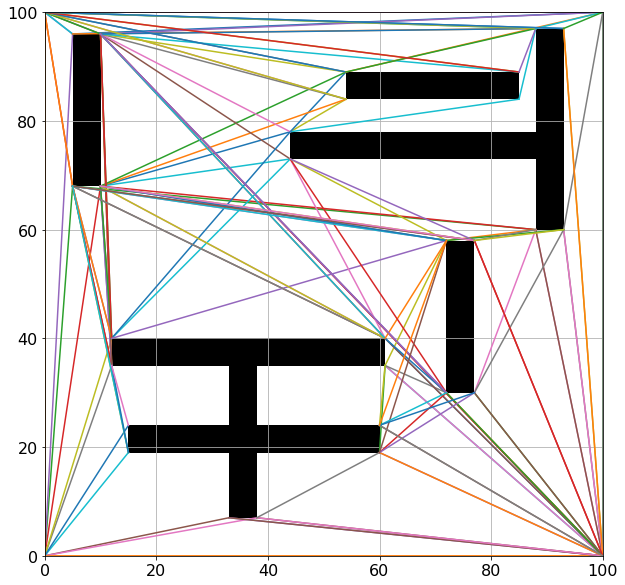

In [ ]:
# Test f_Plot_Visibility_Graph

n = 100
w = int(n/20)
N_obs = 8

X_o,Y_o,I,L = f_Obstacles(n=n,w=w,N_obs=N_obs)
f_Plot_Visibility_Graph(X_o,Y_o,I,L)

This actually isn't quite the visibility graph, because I haven't taken account of the fact that the obstacles themselves may intersect.

## Graph Search Algorithms:

In [53]:
# Build random directed matrix
def f_Random_Directed_Matrix(n,k):
  # Inputs:
  # n = number of nodes
  # k = average number of out edges and in edges per node

  # Output:
  # G = graph adjacency matrix

    # Add edges with probability p. (This is an Erdos-Renyi model.)
    # Since we're not including self-ties, we add n^2-n edges.
    # We must then have n*k edges on average. Thus p = nk/(n^2-n).
    p = n*k/(n**2-n) # Bernoulli probability in Erdos-Renyi model
    u = np.random.choice([0,1],size=n**2,p=[1-p,p]) # Random edges
    G = np.reshape(u,[n,n]) # Build adjacency matrix
    G = G*(1-np.eye(n)) # Zero out the diagonal
    return G

In [54]:
# Build random undirected matrix
def f_Random_Undirected_Matrix(n,k):
  # Inputs:
  # n = number of nodes
  # k = average number of edges per node

  # Output:
  # G = graph adjacency matrix

    sz = int((n**2-n)/2) # Number of random draws = number of above diagonal terms
    p = n*k/(2*sz) # Bernoulli probability in Erdos-Renyi model.
    # (We divide by 2 in p since otherwise we'd get 2k undirected edges (k in and k out))
    u = np.random.choice([0,1],size=sz,p=[1-p,p]) # Random edges
    G = np.zeros((n,n)) # Initialize adjacency matrix
    # Build adjacency matrix
    # Loop over above-diagonal elements
    c = 0
    for i in np.arange(n):
      for j in np.arange(n-(i+1))+(i+1):
        G[i,j] = u[c]
        c+=1
    return G+G.T # Add transpose of G to itself

In [58]:
# Get the neighbors of vertex v in graph G
def f_Get_Neighbors(v,G):
  out_v = np.where(G[v,:]>0)[0] # Edges out of v
  in_v = np.where(G[:,v]>0)[0] # Edges into v
  # Unique edges in the union of these sets:
  return np.unique(np.concatenate((out_v,in_v)))

In [59]:
# Get the neighbors of an array S of vertices in graph G
def f_Get_Set_Neighbors(S,G):
  if np.shape(S)[0] == 1: # (If S contains only 1 vertex)
    neighbors = f_Get_Neighbors(S[0],G)
  else:
    neighbors = []
    # Concatenate all neighbors of each vertex in S
    for v in S:
      neighbors = np.concatenate((neighbors,f_Get_Neighbors(v,G)))
  return np.unique(neighbors) # Return unique set of neighbors

In [60]:
# Implementation of Dijkstra's Algorithm:
def f_Dijkstras_Algorithm_1(n,n0,nf,G):
  # Inputs:
  # n = number of nodes in graph
  # n0 = starting node
  # nf = target node
  # G = grah

  # Ouput:
  # dist = array of distances from n0 to each node in G

  unvisited = np.arange(n) # Initialize array of unvisited nodes
  dist = np.zeros(n)+np.Inf # Initialize array of distances
  dist[n0] = 0 # The distance of the starting node is 0
  current = n0 # Initialize the current node
  # For every node other than n0:
  for j in np.arange(n-1):
    neighbors = f_Get_Neighbors(current,G) # Get neighbors of the current node
    # Get the unvisited neighbors of the current node:
    unvisited_neighbors = np.intersect1d(neighbors,unvisited)
    # Remove the current node from the set of unvisited nodes:
    unvisited = np.setdiff1d(unvisited,current)
    # For every unvisited neighbor of the current node:
    for i in unvisited_neighbors:
      # d is the weight of each edge
      # d = np.sqrt((x[current] - x[i])**2 + (y[current] - y[i])**2) # Euclidean distance
      d = 1 # d = 1 if every edge has the same weight
      # If the distance through the current node to node i is less than
      # node i's tentative distance dist[i], update dist[i].
      dist[i] = np.minimum(dist[i],dist[current]+d)
    # The visited nodes are all nodes other than the unvisited ones.
    visited = np.setdiff1d(np.arange(n),unvisited)
    # Get the candidates for the next current node: those which are a neighbor
    # of a visited node and which are themselves unvisited
    candidates = np.intersect1d(f_Get_Set_Neighbors(visited,G),unvisited).astype(int)
    # If there are no candidates or the target node has been visited, break.
    if len(candidates) == 0:
    # if len(candidates) == 0 or nf in visited:
      break
    # Select the new current node as the one which has minimum
    # tentative distance among the candidates
    current = candidates[np.argmin(dist[candidates])]
  return dist

In [61]:
def f_Shortest_Path(n0,nf,M):
  n_i = nf
  n_v = n_i
  while n_i != n0:
    n_i = np.argmax(M[:,n_i])
    n_v = np.append(n_v,n_i)
  return np.flip(n_v)

In [76]:
# A more efficient implementation of Dijkstra's Algorithm,
# which also records the shortest paths:
def f_Dijkstra(n,n0,nf,G):
  # Inputs:
  # n = number of nodes in graph
  # n0 = starting node
  # nf = target node
  # G = grah

  # Ouputs:
  # dist = array of distances from n0 to each node in G
  # M = adjacency matrix of the directed graph which gives
  # the shortest paths from n0 to every other node
  # path = the shortest path (as an array of nodes) from n0 to nf
  # Mp = an adjacency matrix of a directed graph which gives
  # only the shortest path from n0 to nf

  M = np.zeros((n,n)) # Initialize M
  dist = np.zeros(n)+np.Inf # Initialize array of distances
  dist[n0] = 0 # The distance of the starting node is 0
  current = n0 # Initialize the current node
  visited = np.array([n0]) # Initialize array of visited nodes as n0
  # For every node other than n0:
  for j in np.arange(n-1):
    neighbors = f_Get_Neighbors(current,G) # Get neighbors of the current node
    # Get the unvisited neighbors of the current node:
    unvisited_neighbors = np.setdiff1d(neighbors,visited)
    # For every unvisited neighbor of the current node:
    for i in unvisited_neighbors:
      # d is the weight of each edge
      # d = np.sqrt((x[current] - x[i])**2 + (y[current] - y[i])**2) # Euclidean distance
      d = 1 # d = 1 if every edge has the same weight
      # If the distance through the current node to node i is less than
      # node i's tentative distance dist[i]:
      if dist[current]+d < dist[i]:
        dist[i] = dist[current]+d # Update dist[i]
        M[current,i] = 1 # Add a path from the current node to node i
    # Get the candidates for the next current node: those which are a neighbor
    # of a visited node and which are themselves unvisited
    candidates = np.setdiff1d(f_Get_Set_Neighbors(visited,G),visited).astype(int)
    # If there are no candidates or the target node has been visited, break
    if len(candidates) == 0:
    # if len(candidates) == 0 or nf in visited:
      break
    # Select the new current node as the one which has minimum
    # tentative distance among the candidates
    current = np.array(candidates[np.argmin(dist[candidates])])
    visited = np.append(visited,current) # Update the array of visited nodes
    path = f_Shortest_Path(n0,nf,M) # Find the shortest path from n0 to nf in M
    M_p = np.zeros((n,n)) # Initialize Mp
    # Add every edge in the shortest path to Mp:
    for i in np.arange(len(path)-1):
      M_p[path[i],path[i+1]] = 1

  return dist, M, path, M_p

The shortest path from 0 to 30 is:  [ 0  6 30]


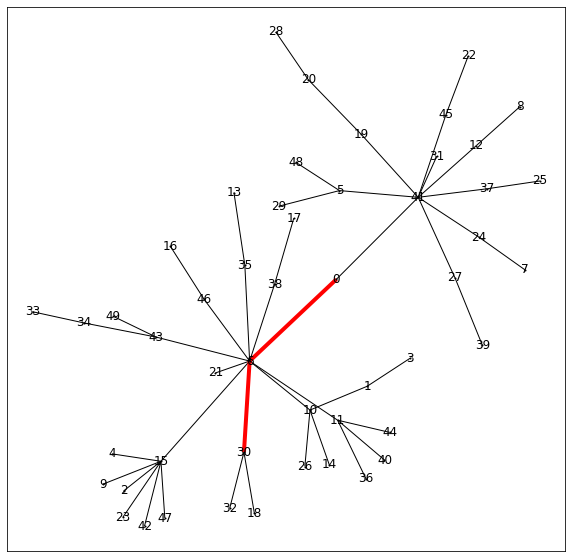

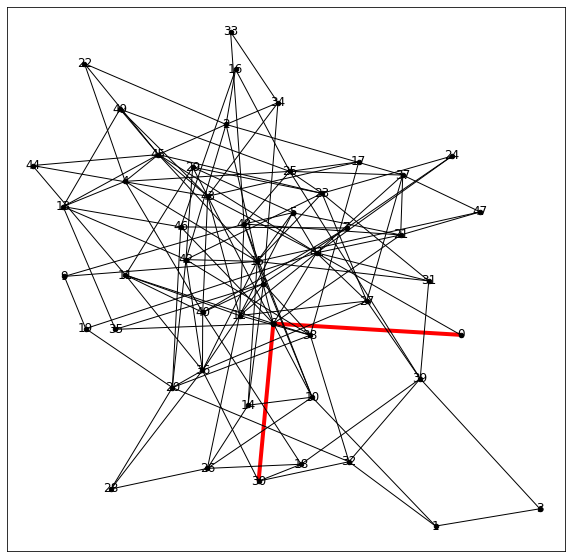

In [82]:
# Test Dijkstra's Algorithm:

import networkx as nx

n = 50 # Number of vertices
k = 6 # Average number of (directed) edges per vertex
G = f_Random_Undirected_Matrix(n,k) # Build adjacency matrix of Erdos-Renyi graph

n0 = 0 # Starting node
nf = np.random.choice(np.setdiff1d(np.arange(n),n0)) # Target node
dist, M, path, M_p = f_Dijkstra(n,n0,nf,G) # Run Dijkstra's Algorithm

# Create networkx objects:
Gnx = nx.from_numpy_matrix(G)
Mnx = nx.from_numpy_matrix(M)
Mnx_p = nx.from_numpy_matrix(M_p)

print("The shortest path from", n0, "to", nf, "is: ", path) # Print shortest path
# Highlight the shortest path in red:
edge_colors = ['black' if not edge in Mnx_p.edges() else 'red' for edge in Mnx.edges()]
edge_widths = [1 if not edge in Mnx_p.edges() else 4 for edge in Mnx.edges()]

# Plot the graph of directed paths:
nx.draw_networkx(Mnx,with_labels=True,node_size=1,node_color='k',edge_color=edge_colors,width=edge_widths,arrows=False)
plt.show()

# Plot the original graph:
edge_colors = ['black' if not edge in Mnx_p.edges() else 'red' for edge in Gnx.edges()]
edge_widths = [1 if not edge in Mnx_p.edges() else 4 for edge in Gnx.edges()]
nx.draw_networkx(Gnx,with_labels=True,node_size=20,node_color='k',edge_color=edge_colors,width=edge_widths)
plt.show()

In [ ]:
# TODO:
# Depth first search
# Breath first search
# A*
# PRM
# RRT
# RRT*
# Multi-directional RRT/RRT*

In [ ]:
# RRT* Pseudo Code
# Rad = r
# G(V,E) //Graph containing edges and vertices
# For itr in range(0…n)
#     Xnew = RandomPosition()
#     If Obstacle(Xnew) == True, try again
#     Xnearest = Nearest(G(V,E),Xnew)
#     Cost(Xnew) = Distance(Xnew,Xnearest)
#     Xbest,Xneighbors = findNeighbors(G(V,E),Xnew,Rad)
#     Link = Chain(Xnew,Xbest)
#     For x’ in Xneighbors
#         If Cost(Xnew) + Distance(Xnew,x’) < Cost(x’)
#             Cost(x’) = Cost(Xnew)+Distance(Xnew,x’)
#             Parent(x’) = Xnew
#             G += {Xnew,x’}
#     G += Link 
# Return G